In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import os
import csv
import datetime
from glob import glob

#Read files           
df_eda =pd.read_csv(r"C:\Users\anilp\Project_Files\1699449460_A044DF\EDA.csv", skiprows=1)
df_hr =pd.read_csv(r"C:\Users\anilp\Project_Files\1699546842_A044DF\HR.csv", skiprows=1)
   
eda_value = df_eda.rename(columns = {'4.000000' : 'EDA'})
hr_value = df_hr.rename(columns = {'1.000000' : 'HR'})

[    6     9    12 ... 20862 20865 20872]


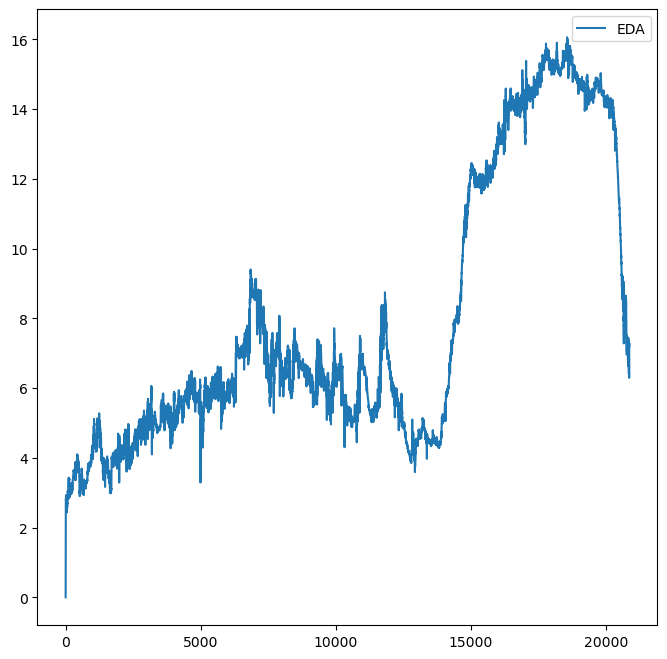

In [6]:
#First eda plot and print peaks

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.legend()

peaks_eda, _ = find_peaks(eda_value['EDA'])
print(peaks_eda)

[   1    3   38   40   60   62   64   76  131  139  149  176  262  292
  301  324  382  392  407  449  495  501  556  567  637  647  703  821
  832  890  900  942 1049 1159 1273 1384 1387 1495 1596 1677 1740 1868
 1871 1948 2074 2157 2238]


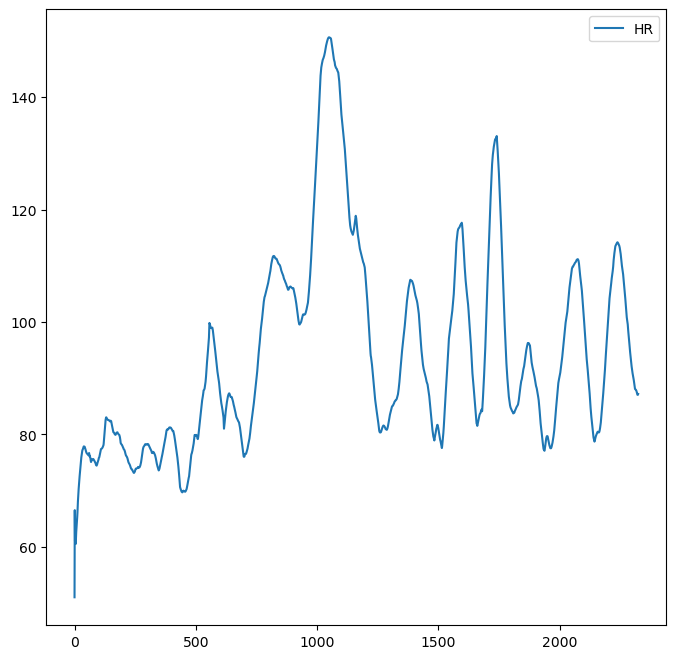

In [7]:
#First hr plot and print peaks

plt.figure(figsize=(8, 8))
plt.plot(hr_value, label='HR')
plt.legend()

peaks_hr, _ = find_peaks(hr_value['HR'])

print(peaks_hr)

In [4]:
#downsample bvp to match eda (DEPRECATED)

# window = 16
# downsampled_bvp = bvp_value.groupby((bvp_value.index/window).astype('i')).mean()

# print(type(downsampled_bvp))

# plt.figure(figsize=(8, 8))
# plt.plot(downsampled_bvp, label='Downsampled BVP')
# plt.legend()

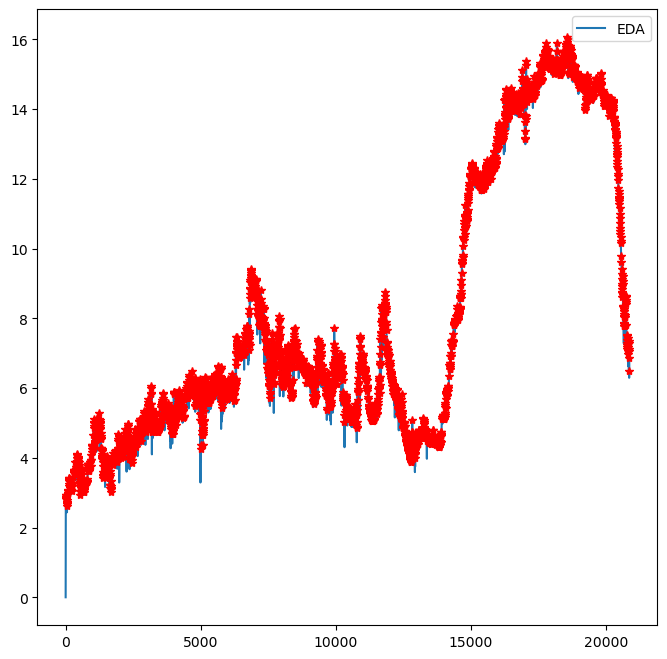

In [8]:
#marking the peaks eda

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.plot(eda_value['EDA'][peaks_eda], 'r*') # 'r*' will plot stars of red color.
plt.legend()

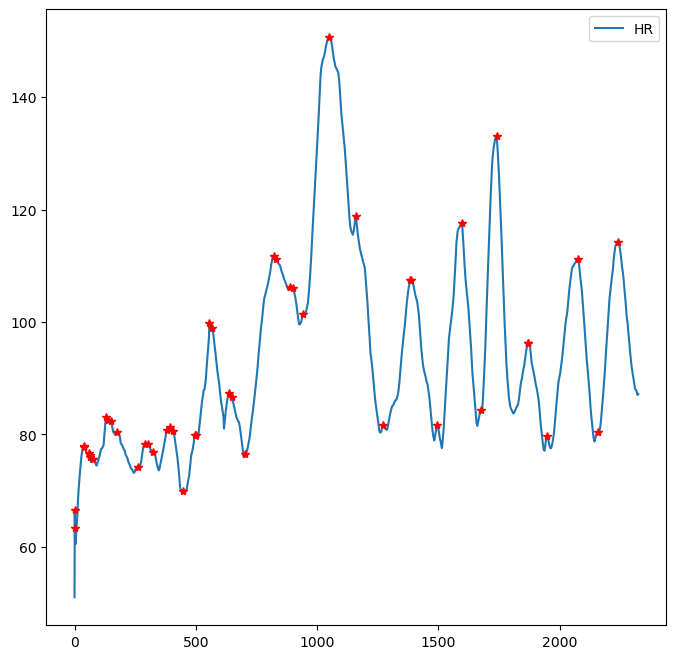

In [9]:
#marking the peaks hr

plt.figure(figsize=(8, 8))
plt.plot(hr_value, label='HR')
plt.plot(hr_value['HR'][peaks_hr], 'r*') # 'r*' will plot stars of red color.
plt.legend()

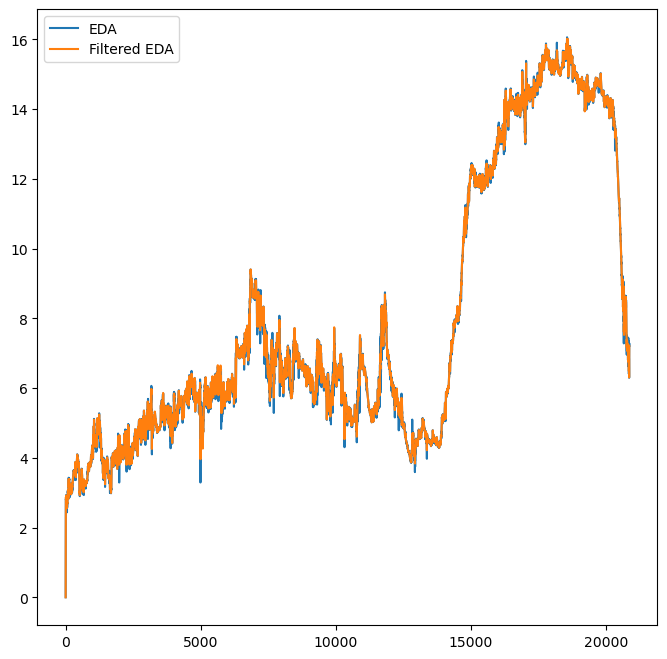

In [10]:
#filtering eda
order = 5 #order of the filter, expressed as integer
f_cut_off = 0.5 #Hz, cut-off frequency
f_sampling = 4 #Hz, sampling frequency

b, a = butter(order, f_cut_off, fs = f_sampling)

filtered_eda = filtfilt(b,a,eda_value, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.plot(filtered_eda, label='Filtered EDA')
plt.legend()

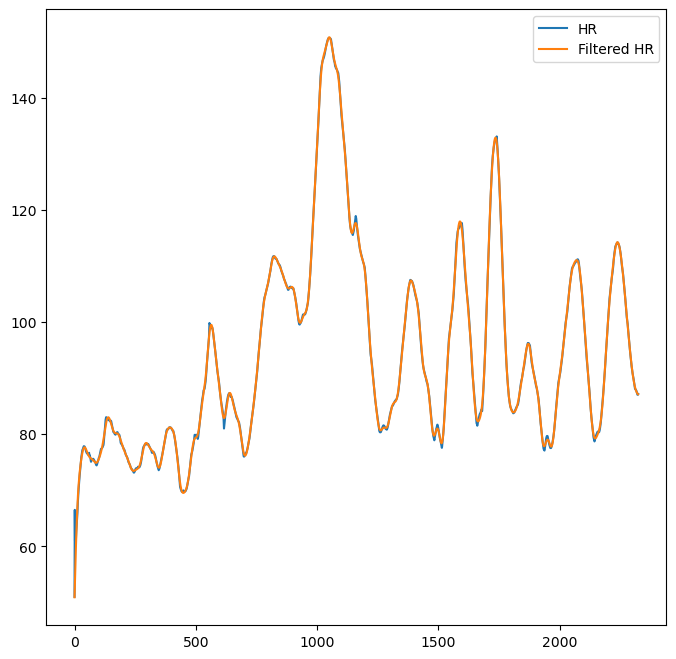

In [11]:
#filtering hr

order = 5 #order of the filter, expressed as integer
f_cut_off = 0.5 #Hz, cut-off frequency
f_sampling = 16 #Hz, sampling frequency

b, a = butter(order, f_cut_off, fs = f_sampling)

filtered_hr = filtfilt(b,a,hr_value, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(hr_value, label='HR')
plt.plot(filtered_hr, label='Filtered HR')
plt.legend()

In [12]:
#normalization of eda 0-1 (DEPRECATED)

# normalized_eda = (filtered_eda-min(filtered_eda))/(max(filtered_eda)-min(filtered_eda))
# plt.figure(figsize=(8, 8))
# plt.plot(normalized_eda, label='Normalized and Filtered EDA')
# plt.legend()

In [13]:
#normalization of bvp 0-1 (DEPRECATED)

# normalized_bvp = (filtered_bvp-min(filtered_bvp))/(max(filtered_bvp)-min(filtered_bvp))
# plt.figure(figsize=(8, 8))
# plt.plot(normalized_bvp, label='Normalized and Filtered BVP')
# plt.legend()

In [17]:
from datetime import datetime, timedelta

# Define start and end times
start_time = datetime.strptime("14:45:00", "%H:%M:%S")
end_time = datetime.strptime("15:50:40", "%H:%M:%S")

# Create a time range with a frequency of 4 seconds
time_range = pd.date_range(start=start_time, end=end_time, freq='4S')

# Extract the time part from the datetime objects
time_values = [time.strftime('%H:%M:%S') for time in time_range.time]

# Create a DataFrame with the time column
df_time = pd.DataFrame({'Time': time_values})

print(df_time)

         Time
0    14:45:00
1    14:45:04
2    14:45:08
3    14:45:12
4    14:45:16
..        ...
981  15:50:24
982  15:50:28
983  15:50:32
984  15:50:36
985  15:50:40

[986 rows x 1 columns]


In [18]:
#reverting numpy arrays back to df and concat

eda_result = pd.DataFrame(filtered_eda, columns = ['EDA'])
hr_result = pd.DataFrame(filtered_hr, columns = ['HR'])

df_result = pd.concat([eda_result, hr_result, df_time], axis = 1)

df_result

,EDA,HR,Time
0,0.000005,50.918604,14:45:00
1,0.623540,52.563514,14:45:04
2,1.213236,54.191938,14:45:08
3,1.737724,55.790416,14:45:12
4,2.171115,57.346539,14:45:16
...,...,...,...
20869,6.553774,NaN,NaN
20870,6.727256,NaN,NaN
20871,6.900847,NaN,NaN
20872,7.059261,NaN,NaN


In [20]:
#export df_result to folder with timestamp
parent_folder = 'C:/Users/anilp/Project_Files'

new_folder = os.path.join(parent_folder)
os.makedirs(new_folder, exist_ok=True) 
csv_file_path = os.path.join(new_folder, 'df_result.csv')

df_result.to_csv(csv_file_path, index=False)
print(f"Data exported to {csv_file_path}")

Data exported to C:/Users/anilp/Project_Files\df_result.csv
